In [1]:
import pandas as pd
from datetime import datetime, timedelta
from google.colab import drive
drive.mount('/content/drive')
import numpy as np

Mounted at /content/drive


1. Get transaction record for remove 0 amount

In [2]:
gdrive_path = "/content/drive" + "/My Drive" + "/Colab Notebooks/Workshop 5/"
dfTrx2023 = pd.read_excel('https://github.com/Thaniparn/MADT8101-Customer-Analytics/raw/786a4c2c170eea3869dbffa2d60aeb284a7f0c42/Workshop5%20-%20Customer%20Segmentation/transaction%202023.xlsx', sheet_name = "trans_data_2023")

In [3]:
from pytz import UTC
dfTrx2023['payment_date'] = pd.to_datetime(dfTrx2023['payment_date']).dt.tz_localize(None)

In [4]:
print(dfTrx2023)

       payment_date          ent  center  \
0        2023-01-01  TCC4QCZJZQI  TKC11Z   
1        2023-01-01  TCC4QCE34Z7  T2CEQ1   
2        2023-01-01  TCC44Q3JQQ2  TFCEZ1   
3        2023-01-01  TCC41JJZCRF  TKCC3J   
4        2023-01-01  TCC4JZCJ1JK  TKCRCW   
...             ...          ...     ...   
362104   2023-07-06  TCCEREZCC10  TKC1Z4   
362105   2023-07-06  TCCEQ1RJ3JY  TKC1Z4   
362106   2023-07-06  TCCEQ4Z4R4Y  TKC1Z4   
362107   2023-07-06  TCCEQEZJQ4F  TKC1Z4   
362108   2023-07-06  TCCEQ434R1F  TKC1Z4   

                                             product_json  total_amount  \
0       [{"product":"5C4CCE","qty":1},{"product":"6CQC...      590000.0   
1       [{"product":"BC4C41","qty":2},{"product":"6CQC...      243000.0   
2       [{"product":"2C1CCW","qty":1},{"product":"2C1C...     1792000.0   
3       [{"product":"2C1CCW","qty":2},{"product":"2C1C...     3025000.0   
4                            [{"product":"4E1J","qty":2}]      198000.0   
...                  

Create new transaction data frame which amount > 0

In [5]:
dfTrx2023Value = dfTrx2023[['payment_date','ent']].loc[dfTrx2023['total_amount'] > 0]
print(dfTrx2023Value)

       payment_date          ent
0        2023-01-01  TCC4QCZJZQI
1        2023-01-01  TCC4QCE34Z7
2        2023-01-01  TCC44Q3JQQ2
3        2023-01-01  TCC41JJZCRF
4        2023-01-01  TCC4JZCJ1JK
...             ...          ...
362104   2023-07-06  TCCEREZCC10
362105   2023-07-06  TCCEQ1RJ3JY
362106   2023-07-06  TCCEQ4Z4R4Y
362107   2023-07-06  TCCEQEZJQ4F
362108   2023-07-06  TCCEQ434R1F

[361951 rows x 2 columns]


2. Get member with classification column from prevous code

In [6]:
pathItem = gdrive_path + "dfCluster.xlsx"
dfCluster = pd.read_excel(pathItem)
print(dfCluster)

       index_x          ent  ClusterCLV  index_y  ClusterFrequency  index  \
0            0  TCC4QCZJZQI           0        0                 2      0   
1            1  TCC4QCE34Z7           1        1                 0      1   
2            2  TCC44Q3JQQ2           1        2                 0      2   
3            3  TCC4JZCJ1JK           1        3                 0      3   
4            4  TCC4WQRQZ40           0        4                 0      4   
...        ...          ...         ...      ...               ...    ...   
28851    28851  TCCEQ1Z1QC7           0    28851                 0  28851   
28852    28852  TCCEQ1Z1QEF           0    28852                 0  28852   
28853    28853  TCCEQ1Z1QW0           0    28853                 0  28853   
28854    28854  TCCEQ1Q1CE7           0    28854                 0  28854   
28855    28855  TCCEQC144J7           0    28855                 0  28855   

       ClusterSNA  
0               0  
1               0  
2              

In [7]:
dfClusterType = pd.DataFrame()
dfClusterType = dfCluster.groupby(['ClusterCLV', 'ClusterFrequency', 'ClusterSNA'])['ent'].count().reset_index()

# Rename the 'ent' column to 'Count'
dfClusterType.rename(columns={'ent': 'Count'}, inplace=True)
print(dfClusterType)

    ClusterCLV  ClusterFrequency  ClusterSNA  Count
0            0                 0           0  15630
1            0                 0           1    477
2            0                 0           2    464
3            0                 1           0   1335
4            0                 1           1     22
5            0                 1           2      8
6            0                 2           0   6415
7            0                 2           1    174
8            0                 2           2     78
9            1                 0           0   1913
10           1                 0           1      9
11           1                 0           2     13
12           1                 1           0     23
13           1                 2           0    576
14           1                 2           1      2
15           1                 2           2      1
16           2                 0           0   1232
17           2                 0           1      1
18          

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


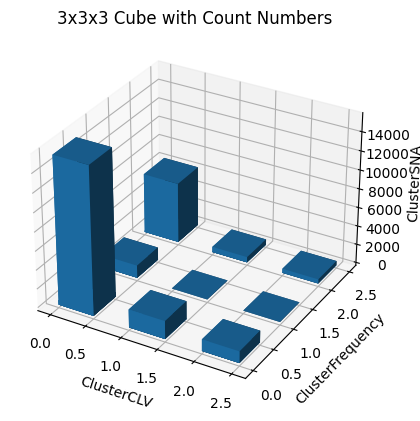

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract coordinates and counts
x, y, z, counts = dfClusterType['ClusterCLV'], dfClusterType['ClusterFrequency'], dfClusterType['ClusterSNA'], dfClusterType['Count']

# Create the bar chart
ax.bar3d(x, y, z, 0.5, 0.5, counts, shade=True)

# Set labels and title
ax.set_xlabel('ClusterCLV')
ax.set_ylabel('ClusterFrequency')
ax.set_zlabel('ClusterSNA')
ax.set_title('3x3x3 Cube with Count Numbers')

plt.show()

3. Get purchase item which already extracted JSON format

In [8]:
pathItem = gdrive_path + "Item_sold.csv"
dfItem = pd.read_csv(pathItem)
print(dfItem)

           Index              Payment_Date Payment_period          ent  \
0              1  2021-01-01T00:00:00.000Z         2021/1  TCC43RQQZ3B   
1              1  2021-01-01T00:00:00.000Z         2021/1  TCC43RQQZ3B   
2              2  2021-01-01T00:00:00.000Z         2021/1  TCC4Q4JZ4Q0   
3              2  2021-01-01T00:00:00.000Z         2021/1  TCC4Q4JZ4Q0   
4              3  2021-01-01T00:00:00.000Z         2021/1  TCC4RJ11QE7   
...          ...                       ...            ...          ...   
4129100  2406312  2023-07-06T00:00:00.000Z         2023/7  TCCEREZCC10   
4129101  2406313  2023-07-06T00:00:00.000Z         2023/7  TCCEQ1RJ3JY   
4129102  2406314  2023-07-06T00:00:00.000Z         2023/7  TCCEQ4Z4R4Y   
4129103  2406315  2023-07-06T00:00:00.000Z         2023/7  TCCEQEZJQ4F   
4129104  2406316  2023-07-06T00:00:00.000Z         2023/7  TCCEQ434R1F   

        Sold_product  Qty sold  Channel  
0               1ECZ         1   online  
1             8CEC4Q       

In [9]:
dfItem.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Index,4129105.0,1.289323e+06,661600.539057,1.0,764188.0,1342205.0,1829846.0,2406316.0
Qty sold,4129105.0,1.446161e+00,9.241024,1.0,1.0,1.0,1.0,13300.0


In [10]:
dfItem.head()

,Index,Payment_Date,Payment_period,ent,Sold_product,Qty sold,Channel
0,1,2021-01-01T00:00:00.000Z,2021/1,TCC43RQQZ3B,1ECZ,1,online
1,1,2021-01-01T00:00:00.000Z,2021/1,TCC43RQQZ3B,8CEC4Q,1,online
2,2,2021-01-01T00:00:00.000Z,2021/1,TCC4Q4JZ4Q0,4E4W,2,online
3,2,2021-01-01T00:00:00.000Z,2021/1,TCC4Q4JZ4Q0,DC4CC4,1,online
4,3,2021-01-01T00:00:00.000Z,2021/1,TCC4RJ11QE7,IC4CC4,1,online


Filter items which belong to member in cluster list

In [11]:
dfItemFilter = dfItem.loc[(dfItem['ent'].isin(dfCluster['ent']))]
dfItemFilter['Payment_Date'] = pd.to_datetime(dfItemFilter['Payment_Date']).dt.tz_localize(None)
print(dfItemFilter)
dfItemFilter.head()


           Index Payment_Date Payment_period          ent Sold_product  \
69            55   2021-01-01         2021/1     TZEEQRRU       5C4C4Q   
76            59   2021-01-01         2021/1  TCC4QEZQW4I       5C4CC4   
77            59   2021-01-01         2021/1  TCC4QEZQW4I       BC4CC4   
78            59   2021-01-01         2021/1  TCC4QEZQW4I       XC4CCE   
131          102   2021-01-01         2021/1  TCC4R41QQW5       8C4CCQ   
...          ...          ...            ...          ...          ...   
4129100  2406312   2023-07-06         2023/7  TCCEREZCC10       KCQCEJ   
4129101  2406313   2023-07-06         2023/7  TCCEQ1RJ3JY       KCQCEJ   
4129102  2406314   2023-07-06         2023/7  TCCEQ4Z4R4Y       KCQCEJ   
4129103  2406315   2023-07-06         2023/7  TCCEQEZJQ4F       KCQCER   
4129104  2406316   2023-07-06         2023/7  TCCEQ434R1F       KCQCER   

         Qty sold  Channel  
69              1   online  
76              1   online  
77              1   onli

<ipython-input-11-c90cdec9f634>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfItemFilter['Payment_Date'] = pd.to_datetime(dfItemFilter['Payment_Date']).dt.tz_localize(None)


,Index,Payment_Date,Payment_period,ent,Sold_product,Qty sold,Channel
69,55,2021-01-01,2021/1,TZEEQRRU,5C4C4Q,1,online
76,59,2021-01-01,2021/1,TCC4QEZQW4I,5C4CC4,1,online
77,59,2021-01-01,2021/1,TCC4QEZQW4I,BC4CC4,1,online
78,59,2021-01-01,2021/1,TCC4QEZQW4I,XC4CCE,1,online
131,102,2021-01-01,2021/1,TCC4R41QQW5,8C4CCQ,1,online


Filter items which belong to non zero transaction amount

In [12]:
dfItemFilter2 = dfItemFilter.merge(dfTrx2023Value[['ent', 'payment_date']], left_on=['ent', 'Payment_Date'], right_on=['ent', 'payment_date'], how='inner')
print(dfItemFilter2)
dfItemFilter2.head()

          Index Payment_Date Payment_period          ent Sold_product  \
0       2044208   2023-01-01         2023/1  TCC4QCZJZQI       5C4CCE   
1       2044208   2023-01-01         2023/1  TCC4QCZJZQI       6CQC41   
2       2044209   2023-01-01         2023/1  TCC4QCE34Z7       BC4C41   
3       2044209   2023-01-01         2023/1  TCC4QCE34Z7       6CQC41   
4       2044210   2023-01-01         2023/1  TCC44Q3JQQ2       2C1CCW   
...         ...          ...            ...          ...          ...   
475539  2406309   2023-07-06         2023/7  TCCEJZJ1CZ5       KCQCEJ   
475540  2406311   2023-07-06         2023/7  TCCEQ1331E7       KCQCER   
475541  2406312   2023-07-06         2023/7  TCCEREZCC10       KCQCEJ   
475542  2406313   2023-07-06         2023/7  TCCEQ1RJ3JY       KCQCEJ   
475543  2406314   2023-07-06         2023/7  TCCEQ4Z4R4Y       KCQCEJ   

        Qty sold  Channel payment_date  
0              1   online   2023-01-01  
1              1   online   2023-01-01  


,Index,Payment_Date,Payment_period,ent,Sold_product,Qty sold,Channel,payment_date
0,2044208,2023-01-01,2023/1,TCC4QCZJZQI,5C4CCE,1,online,2023-01-01
1,2044208,2023-01-01,2023/1,TCC4QCZJZQI,6CQC41,1,online,2023-01-01
2,2044209,2023-01-01,2023/1,TCC4QCE34Z7,BC4C41,2,online,2023-01-01
3,2044209,2023-01-01,2023/1,TCC4QCE34Z7,6CQC41,1,online,2023-01-01
4,2044210,2023-01-01,2023/1,TCC44Q3JQQ2,2C1CCW,1,online,2023-01-01


4. Select one cluster of member to do product recommendation

In [13]:
dfCluster2 = dfCluster.loc[(dfCluster['ClusterCLV'] == 0) & (dfCluster['ClusterFrequency'] == 0) & (dfCluster['ClusterSNA'] == 0)]
print(dfCluster2)
dfItemFilter2 = dfItem.loc[dfItem['ent'].isin(dfCluster2['ent'])]
print(dfItemFilter2)

       index_x          ent  ClusterCLV  index_y  ClusterFrequency  index  \
4            4  TCC4WQRQZ40           0        4                 0      4   
11          11  TCC4E1C1EZK           0       11                 0     11   
13          13  TCC4RWE3Z45           0       13                 0     13   
14          14  TCC4WQCQR42           0       14                 0     14   
15          15  TCC41C1QECI           0       15                 0     15   
...        ...          ...         ...      ...               ...    ...   
28851    28851  TCCEQ1Z1QC7           0    28851                 0  28851   
28852    28852  TCCEQ1Z1QEF           0    28852                 0  28852   
28853    28853  TCCEQ1Z1QW0           0    28853                 0  28853   
28854    28854  TCCEQ1Q1CE7           0    28854                 0  28854   
28855    28855  TCCEQC144J7           0    28855                 0  28855   

       ClusterSNA  
4               0  
11              0  
13             

Filter items that will belong to selected classification group

In [14]:
dfItemFilter3 = dfItemFilter2.loc[(dfItemFilter2['ent'].isin(dfCluster2['ent']))]
print(dfItemFilter3)

           Index              Payment_Date Payment_period          ent  \
69            55  2021-01-01T00:00:00.000Z         2021/1     TZEEQRRU   
131          102  2021-01-01T00:00:00.000Z         2021/1  TCC4R41QQW5   
132          102  2021-01-01T00:00:00.000Z         2021/1  TCC4R41QQW5   
206          152  2021-01-01T00:00:00.000Z         2021/1  TCC4RQ4ER4K   
262          189  2021-01-01T00:00:00.000Z         2021/1  TCC4C4C1E4P   
...          ...                       ...            ...          ...   
4129099  2406311  2023-07-06T00:00:00.000Z         2023/7  TCCEQ1331E7   
4129101  2406313  2023-07-06T00:00:00.000Z         2023/7  TCCEQ1RJ3JY   
4129102  2406314  2023-07-06T00:00:00.000Z         2023/7  TCCEQ4Z4R4Y   
4129103  2406315  2023-07-06T00:00:00.000Z         2023/7  TCCEQEZJQ4F   
4129104  2406316  2023-07-06T00:00:00.000Z         2023/7  TCCEQ434R1F   

        Sold_product  Qty sold  Channel  
69            5C4C4Q         1   online  
131           8C4CCQ       

5. Product recommendation

In [50]:
purchased_items = dfItemFilter3.groupby(['ent'])['Sold_product'].agg(list).reset_index()
purchased_items.head()
print(purchased_items)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


               ent                                       Sold_product
0      BCCCCREW3WY  [UC4CC1, KCQCEC, 8CECCZ, BCECCQ, UCECC4, BC4C4...
1         BCE4JERY  [8C4CC4, 8C4CCR, 44C4, 4E1J, IC4CC4, 8C4CCR, 8...
2      DCCCCC4QC1Y   [8C4CCR, 5CJCCW, 8C4CCR, KCEC4W, 8C4CCR, YC1CC4]
3      DCCCCC4WRC5  [KCJCJC, 5C4CCE, BC4CCW, XC4CCE, KCEC4W, 8C4CC...
4         HCQ1QZ12  [5C4CCE, 44C4, 5C4CCE, 6CQC41, 5C4CCE, BC4CC4,...
...            ...                                                ...
15625     TZZQC4ZF  [6CECC4, KC4CE1, 44C4, 5C4C4W, 5C4CCE, 8C4C4Z,...
15626     TZZZ3JC2  [7C4CC4, 5C4CCE, 8C4CCR, 5C4CCE, 5C4CC4, 7C4CC...
15627     TZZZC4WU  [2CECC4, 8C4CC3, 8C4CC3, XP9LI, 8C4CC3, 8C4CC3...
15628     TZZZEQ4Y  [0C4CCZ, 5C4CCE, EQE1, KC4CEZ, KCJC1W, UC4CC1,...
15629     TZZZJ3WP  [8C4CCJ, 8C4CCJ, 8C4CCJ, 5C4CC4, 0C4CC3, 8C4CC...

[15630 rows x 2 columns]


In [51]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

mlb = MultiLabelBinarizer()
encoded_data = mlb.fit_transform(purchased_items['Sold_product'])
df_pi = pd.DataFrame(encoded_data, columns=mlb.classes_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
frequent_itemsets = apriori(df_pi, min_support=0.2, use_colnames=True)
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support                  itemsets
0   0.255470                  (0C4CCZ)
1   0.351120                  (5C4C44)
2   0.378567                  (5C4CC4)
3   0.422969                  (5C4CCE)
4   0.447089                  (6CQC41)
5   0.380358                  (7C4CC4)
6   0.315675                  (8C4C4C)
7   0.351759                  (8C4CC4)
8   0.267179                  (8C4CCQ)
9   0.312604                  (8C4CCR)
10  0.257774                  (8C4CE4)
11  0.289187                  (BC4C41)
12  0.389827                  (BC4CC4)
13  0.276008                  (KC4CC4)
14  0.266603                  (KCECWJ)
15  0.280486                  (XC4CCE)
16  0.389891                  (YC1CC4)
17  0.238004          (5C4CC4, 5C4C44)
18  0.235765          (5C4CCE, 5C4C44)
19  0.233909          (6CQC41, 5C4C44)
20  0.218874          (5C4C44, 7C4CC4)
21  0.218170          (5C4C44, BC4CC4)
22  0.284453          (5C4CC4, 5C4CCE)
23  0.263980          (5C4CC4, 6CQC41)
24  0.231542          (5C

In [67]:
print(frequent_itemsets.sort_values(by='support', ascending=False))

     support                  itemsets
4   0.447089                  (6CQC41)
3   0.422969                  (5C4CCE)
16  0.389891                  (YC1CC4)
12  0.389827                  (BC4CC4)
5   0.380358                  (7C4CC4)
2   0.378567                  (5C4CC4)
7   0.351759                  (8C4CC4)
1   0.351120                  (5C4C44)
6   0.315675                  (8C4C4C)
9   0.312604                  (8C4CCR)
11  0.289187                  (BC4C41)
29  0.284965          (5C4CCE, 6CQC41)
22  0.284453          (5C4CC4, 5C4CCE)
15  0.280486                  (XC4CCE)
13  0.276008                  (KC4CC4)
8   0.267179                  (8C4CCQ)
14  0.266603                  (KCECWJ)
23  0.263980          (5C4CC4, 6CQC41)
10  0.257774                  (8C4CE4)
0   0.255470                  (0C4CCZ)
33  0.254511          (5C4CCE, 8C4CCR)
46  0.249840          (BC4CC4, 7C4CC4)
32  0.248241          (5C4CCE, 8C4CC4)
37  0.244018          (6CQC41, 7C4CC4)
40  0.239859          (6C

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
rules = association_rules(frequent_itemsets, metric ="confidence", min_threshold = 0.05)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(5C4CC4),(5C4C44),0.378567,0.351120,0.238004,0.628697,1.790549,0.105082,1.747576,0.710474
1,(5C4C44),(5C4CC4),0.351120,0.378567,0.238004,0.677843,1.790549,0.105082,1.928973,0.680421
2,(5C4CCE),(5C4C44),0.422969,0.351120,0.235765,0.557404,1.587505,0.087252,1.466079,0.641353
3,(5C4C44),(5C4CCE),0.351120,0.422969,0.235765,0.671465,1.587505,0.087252,1.756377,0.570338
4,(6CQC41),(5C4C44),0.447089,0.351120,0.233909,0.523183,1.490041,0.076927,1.360857,0.594811
...,...,...,...,...,...,...,...,...,...,...
83,"(5C4CCE, 6CQC41)",(8C4CCR),0.284965,0.312604,0.205374,0.720700,2.305475,0.116293,2.461143,0.791919
84,"(6CQC41, 8C4CCR)",(5C4CCE),0.239859,0.422969,0.205374,0.856228,2.024330,0.103921,4.013526,0.665679
85,(5C4CCE),"(6CQC41, 8C4CCR)",0.422969,0.239859,0.205374,0.485554,2.024330,0.103921,1.477592,0.876919
86,(8C4CCR),"(5C4CCE, 6CQC41)",0.312604,0.284965,0.205374,0.656979,2.305475,0.116293,2.084524,0.823761


In [69]:
rules.sort_values(by='support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(5C4CCE),(6CQC41),0.422969,0.447089,0.284965,0.673726,1.506916,0.095860,1.694620,0.582972
25,(6CQC41),(5C4CCE),0.447089,0.422969,0.284965,0.637378,1.506916,0.095860,1.591277,0.608404
11,(5C4CCE),(5C4CC4),0.422969,0.378567,0.284453,0.672516,1.776477,0.124331,1.897596,0.757478
10,(5C4CC4),(5C4CCE),0.378567,0.422969,0.284453,0.751394,1.776477,0.124331,2.321070,0.703355
13,(6CQC41),(5C4CC4),0.447089,0.378567,0.263980,0.590441,1.559674,0.094726,1.517322,0.649002
...,...,...,...,...,...,...,...,...,...,...
75,(5C4CCE),"(5C4CC4, 8C4CC4)",0.422969,0.230070,0.200256,0.473453,2.057863,0.102943,1.462225,0.890868
73,(5C4CC4),"(5C4CCE, 8C4CC4)",0.378567,0.248241,0.200256,0.528984,2.130934,0.106280,1.596039,0.854029
72,"(5C4CCE, 8C4CC4)",(5C4CC4),0.248241,0.378567,0.200256,0.806701,2.130934,0.106280,3.214881,0.705973
71,"(5C4CC4, 5C4CCE)",(8C4CC4),0.284453,0.351759,0.200256,0.704004,2.001378,0.100197,2.190029,0.699247


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


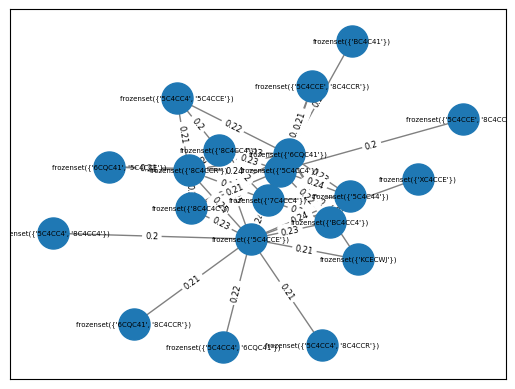

In [80]:
rules1 = rules[rules['support'] >= 0.2]
import networkx as nx
import matplotlib.pyplot as plt


# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
nodes = set()
for i in range(len(rules1)):
    nodes.add(rules1.loc[i, 'antecedents'])
    nodes.add(rules1.loc[i, 'consequents'])
G.add_nodes_from(nodes)

# Add edges to the graph
for i in range(len(rules1)):
    antecedents = rules1.loc[i, 'antecedents']
    consequents = rules1.loc[i, 'consequents']
    support = round(rules1.loc[i, 'support'],2)
    G.add_edge(antecedents, consequents, weight=support)

# Set the position of nodes in the graph
pos = nx.spring_layout(G)

# Draw the graph
nx.draw_networkx(G, pos, with_labels=True, node_size=500, font_size=5, edge_color='gray',width=1)

# Add edge weights as labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

# Show the graph
plt.show()